<a href="https://colab.research.google.com/github/msammons82/teslaStockAnalyis/blob/main/Tesla_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
tickername = 'TSLA'
tickerData = yf.Ticker(tickername)
tickerDf = tickerData.history(period = '1d', start = '2020-1-1', end = '2022-04-10')
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,47660500,0,0.0
2020-01-03,88.099998,90.800003,87.384003,88.601997,88892500,0,0.0
2020-01-06,88.094002,90.311996,88.000000,90.307999,50665000,0,0.0
2020-01-07,92.279999,94.325996,90.671997,93.811996,89410500,0,0.0
2020-01-08,94.739998,99.697998,93.646004,98.428001,155721500,0,0.0
...,...,...,...,...,...,...,...
2022-04-04,1089.380005,1149.910034,1072.530029,1145.449951,27345300,0,0.0
2022-04-05,1136.300049,1152.869995,1087.300049,1091.260010,26691700,0,0.0
2022-04-06,1073.469971,1079.000000,1027.699951,1045.760010,29782800,0,0.0


In [ ]:
tickerSymbol = 'TSLA'
tickerData = yf.Ticker(tickerSymbol)


{'52WeekChange': 0.46085358,
 'SandP52WeekChange': 0.0872798,
 'address1': '13101 Tesla Road',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 975.83,
 'askSize': 1300,
 'averageDailyVolume10Day': 24160130,
 'averageVolume': 26554929,
 'averageVolume10days': 24160130,
 'beta': 2.079411,
 'beta3Year': None,
 'bid': 977.95,
 'bidSize': 1100,
 'bookValue': 29.225,
 'category': None,
 'circulatingSupply': None,
 'city': 'Austin',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 975.93,
 'currentRatio': 1.375,
 'dateShortInterest': 1647302400,
 'dayHigh': 1008.41,
 'dayLow': 974.64,
 'debtToEquity': 28.192,
 'dividendRate': None,
 'dividendYield': None,
 'earningsGrowth': 7.538,
 'earningsQuarterlyGrowth': 7.596,
 'ebitda': 9333000192,
 'ebitdaMargins': 0.1734,
 'enterpriseToEbitda': 112.766,
 'enterpriseToRevenue': 19.554,
 'enterpriseValue': 1052442689536,
 'exDividendDate': None,
 'exchange': 'NMS',


In [ ]:
tickerData.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-16 07:42:00,JP Morgan,Overweight,,main
2012-02-16 13:53:00,Wunderlich,Hold,,down
2012-02-17 06:17:00,Oxen Group,Buy,,init
2012-03-26 07:31:00,Wunderlich,Buy,,up
2012-05-22 05:57:00,Maxim Group,Buy,,init
...,...,...,...,...
2022-02-14 12:11:33,Piper Sandler,Overweight,,main
2022-02-25 11:15:53,Daiwa Capital,Outperform,Neutral,up
2022-04-04 10:49:23,JP Morgan,Underweight,,main


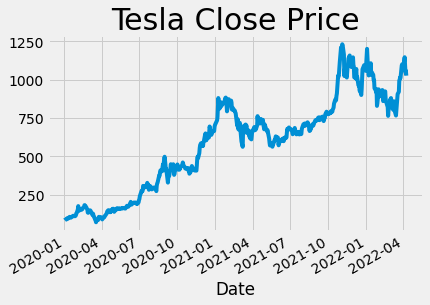

In [ ]:
plt.style.use('fivethirtyeight')
tickerDf.Close.plot()
plt.title('Tesla Close Price', fontsize = 30)
plt.show()

In [ ]:
tickerDf['Daily_Returns'] = tickerDf['Close'].pct_change()
tickerDf['Monthly_Returns'] = tickerDf['Close'].resample('M').ffill().pct_change()
tickerDf = tickerDf.dropna()
tickerDf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns,MA200,Daily_Returns,Monthly Returns,Monthly_Returns
Date,,,,,,,,,,,,
2020-12-31,699.989990,718.719971,691.119995,705.669983,49649900,0,0.0,0.015674,332.695090,0.243252,0.243252,0.243252
2021-03-31,646.619995,672.000000,641.109985,667.929993,33337300,0,0.0,0.050832,517.863029,-0.053481,-0.011207,-0.053481
2021-04-30,667.590027,715.469971,666.140015,709.440002,40758700,0,0.0,0.047917,567.447909,0.062147,0.062147,0.062147
2021-06-30,679.770020,692.809998,678.140015,679.700012,18924900,0,0.0,-0.001557,624.069850,-0.041920,0.087137,-0.041920
2021-08-31,733.000000,740.390015,726.440002,735.719971,20855400,0,0.0,0.006581,679.615548,0.082419,0.070605,0.082419
2021-09-30,781.000000,789.130005,775.000000,775.479980,17956000,0,0.0,-0.007462,700.493949,0.054042,0.054042,0.054042
2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,27092000,0,0.0,0.006834,745.925299,0.476195,0.027612,0.476195
2021-12-31,1073.439941,1082.000000,1054.589966,1056.780029,13577900,0,0.0,-0.012669,782.027548,-0.076855,-0.076855,-0.076855
2022-01-31,872.710022,937.989990,862.049988,936.719971,34812000,0,0.0,0.106776,815.331348,-0.113609,-0.113609,-0.113609


In [ ]:
tickerDf_cum_returns = (tickerDf.Daily_Returns + 1).cumprod()

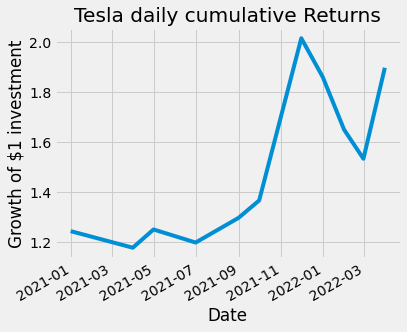

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
tickerDf_cum_returns.plot()
ax1.set_xlabel('Date')
ax1.set_ylabel('Growth of $1 investment')
ax1.set_title('Tesla daily cumulative Returns')
plt.show()

In [ ]:
tickerDf['MA200'] = tickerDf['Close'].rolling(window = 200).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


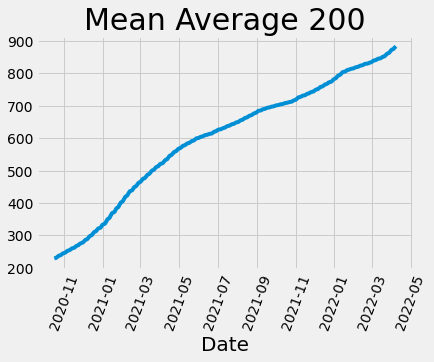

In [ ]:
plt.plot(tickerDf['MA200'])
plt.title('Mean Average 200', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.xticks(rotation = 70)
plt.show()

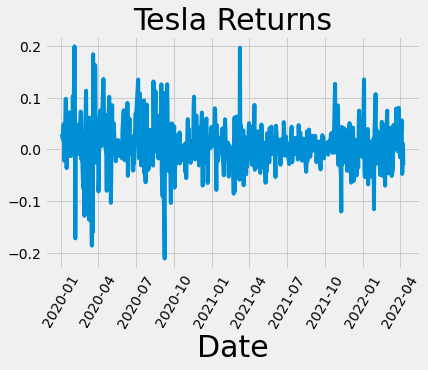

In [ ]:
plt.plot(tickerDf['Returns'])
plt.title('Tesla Returns', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
tsla_month = tickerDf.resample('M').mean()

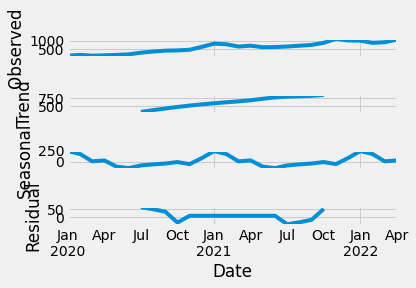

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
decomposition = seasonal_decompose(tsla_month.Close, model = 'additive')
fig = decomposition.plot()
plt.show()

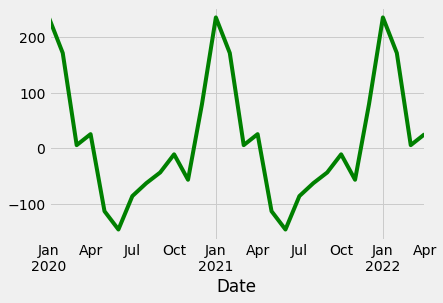

In [ ]:
seasonality = decomposition.seasonal
seasonality.plot(color='green')

In [ ]:
stat = adfuller(tickerDf['Returns'])
print('The p -value obtained from the Dickey-Fuller test is: ',stat[1])

The p -value obtained from the Dickey-Fuller test is:  0.0


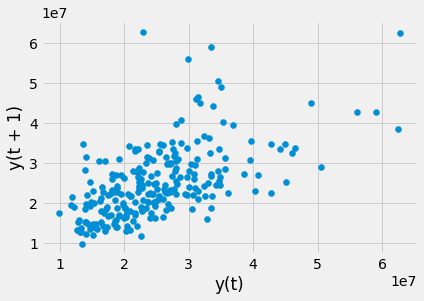

In [ ]:
from pandas.plotting import lag_plot
lag_plot(tickerDf['Volume'].tail(250))

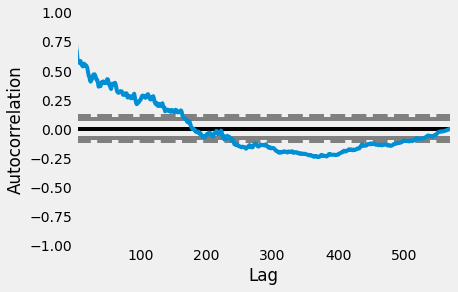

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(tickerDf['Volume'])

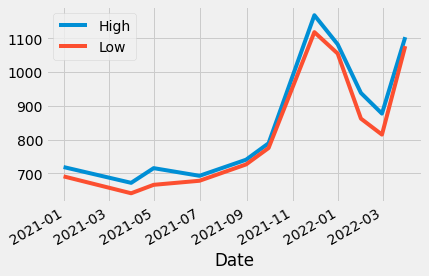

In [ ]:
tickerDf.High.plot()
tickerDf.Low.plot()
plt.legend()
plt.show()

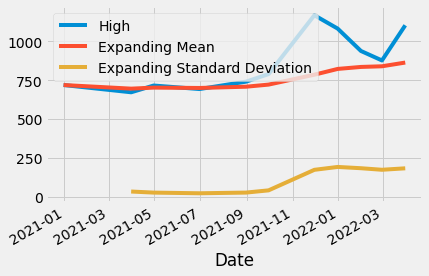

In [ ]:
tsla_mean = tickerDf.High.expanding().mean()
tsla_std = tickerDf.High.expanding().std()
tickerDf.High.plot()
tsla_mean.plot()
tsla_std.plot()
plt.legend(['High', 'Expanding Mean', 'Expanding Standard Deviation'])
plt.show()

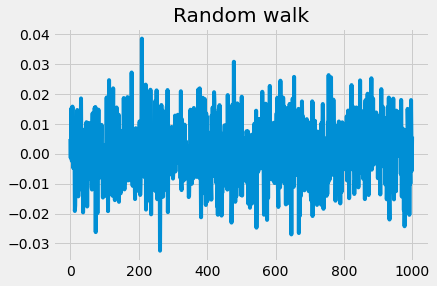

In [ ]:
from numpy.random import normal, seed
seed(42)
random_walk = normal(loc=0, scale = 0.01, size = 1000)
plt.plot(random_walk)
plt.title('Random walk')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


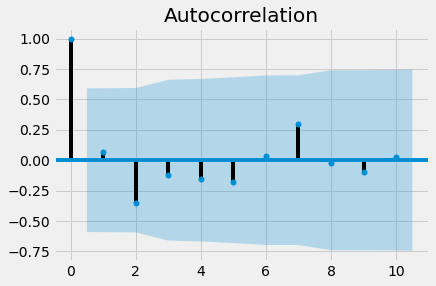

In [ ]:
plot_acf(tickerDf['Returns'])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


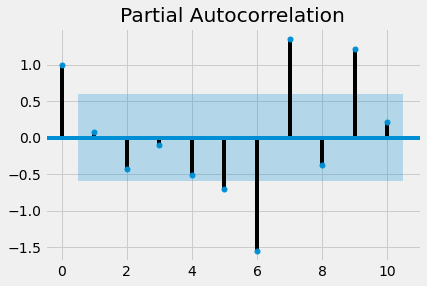

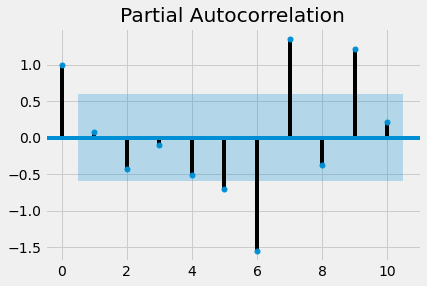

In [ ]:
plot_pacf(tickerDf['Returns'])

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


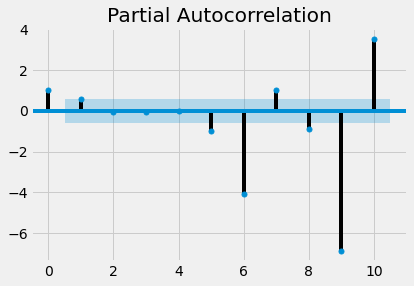

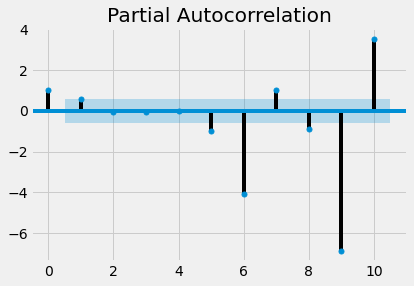

In [ ]:
plot_pacf(tickerDf['Close'])

In [ ]:
df.corr()

NameError: ignored

In [ ]:
from statsmodels.tsa.api import ARIMA

In [ ]:
aic_vals = []
for i in range(3):
  model = ARIMA(tickerDf['Monthly Returns'], order = (0,i,0))
  result = model.fit()
  aic_vals.append(result.aic)
  if i == 0:
    continue

  print('At oder =', i -1, 'AIC value = ', aic_vals[i-1])

At oder = 0 AIC value =  -13.089242968879663
At oder = 1 AIC value =  -7.715337485895478


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [ ]:
model = ARIMA(tickerDf['Monthly Returns'], order = (0,1,0))
result = model.fit()
print(result.aic)
print(result.summary)

-7.715337485895478
<bound method ARMAResults.summary of <statsmodels.tsa.arima_model.ARIMAResults object at 0x7f4359d8ad50>>


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
residuals = pd.DataFrame(result.resid)
residuals = residuals.iloc[1:]

In [ ]:
residuals.describe()

,0
count,9.000000
mean,0.028215
std,0.117150
min,-0.103942
25%,-0.025906
50%,-0.016008
75%,0.043365
max,0.309301


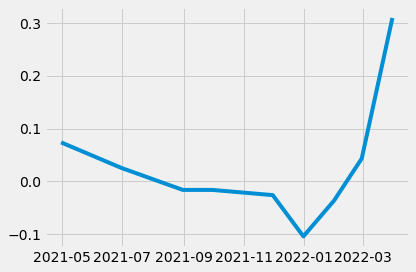

In [ ]:
plt.plot(residuals)
plt.tight_layout()
plt.show()

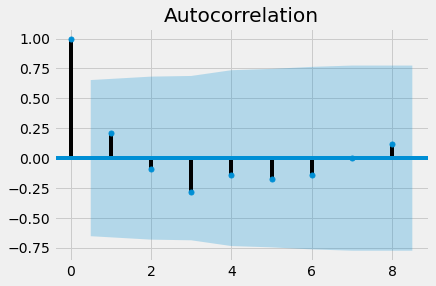

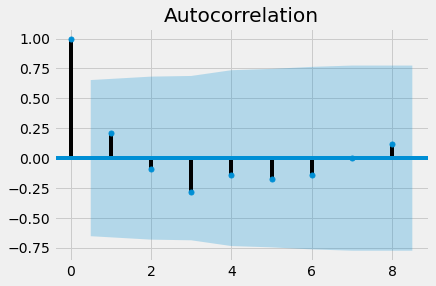

In [ ]:
plot_acf(residuals)

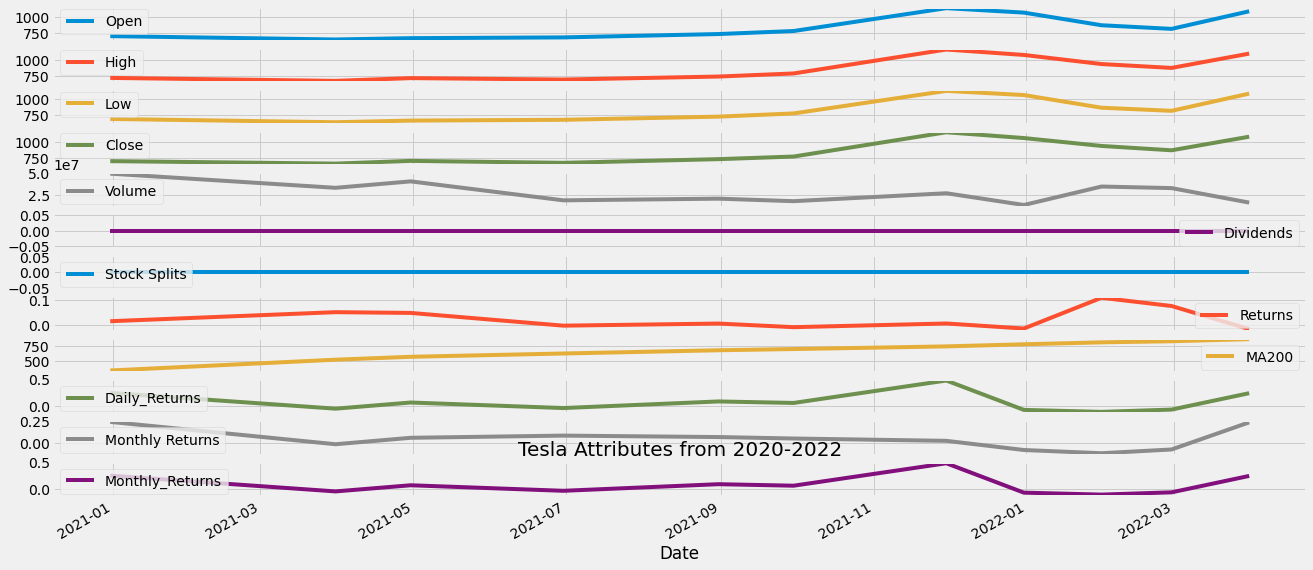

In [ ]:
tickerDf['2020':'2022'].plot(subplots = True, figsize = (20,10))
plt.title('Tesla Attributes from 2020-2022', fontsize = 20)
plt.show()